In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, SpatialDropout1D

# Load the IMDb dataset
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cut texts after this number of words (among top max_features most common words)

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure consistent input length
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# Define the RNN model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))  # Embedding layer
model.add(SpatialDropout1D(0.2))  # Spatial dropout to prevent overfitting
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))  # SimpleRNN layer with dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification (positive or negative sentiment)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(input_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(input_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_1                  │ ?                           │     0 (unbuilt) │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 211s 323ms/step - accuracy: 0.5062 - loss: 0.7095 - val_accuracy: 0.5092 - val_loss: 0.6876
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 193s 309ms/step - accuracy: 0.5571 - loss: 0.6798 - val_accuracy: 0.5882 - val_loss: 0.6587
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 232s 370ms/step - accuracy: 0.6377 - loss: 0.6375 - val_accuracy: 0.5982 - val_loss: 0.6464
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 231s 369ms/step - accuracy: 0.7007 - loss: 0.5696 - val_accuracy: 0.6236 - val_loss: 0.6445
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 218s 349ms/step - accuracy: 0.7335 - loss: 0.5136 - val_accuracy: 0.6414 - val_loss: 0.6572
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 267s 358ms/step - accuracy: 0.7748 - loss: 0.4591 - val_accuracy: 0.6570 - val_loss: 0.6731
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 234s 374ms/step - accuracy: 0.8177 - loss: 0.3965 - val_accuracy: 0.6722 - val_loss: 0.7133
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 242s 386ms/step - accuracy: 0.8600 -

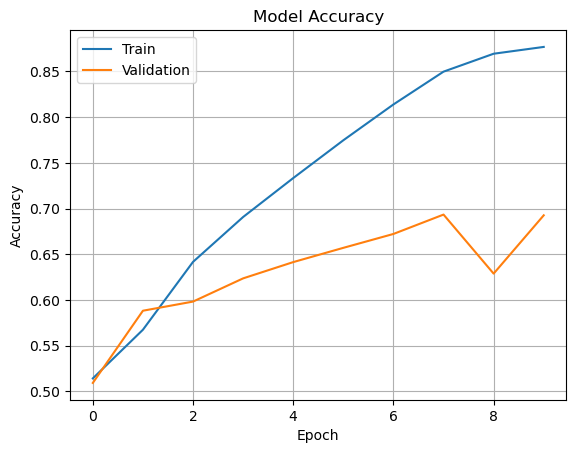

In [4]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation') 
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()